# SPAIN ELECTRICITY SHORTFALL

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation.

We were task to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

In this project we are tasked to: 
 - model the shortfall between the energy generated by means of fossil fuels and various renewable sources for the country of Spain.  
 - Perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.

The daily shortfall, which will be referred to as the target variable(y), which will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc.(X)

In [790]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url='https://storage.googleapis.com/kaggle-competitions/kaggle/36377/logos/header.png')


<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Cleaning</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

<a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
In this section we will import the libraries that will be used throughout your analysis and modelling.

In [791]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
import plotly.express as px
import math



# Libraries for data preparation and model building
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression
from sklearn.metrics import mean_squared_error as MSE
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from statsmodels.graphics.correlation import plot_corr
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols
from scipy.stats import pearsonr
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

<a id="two"></a>
## 2. DATA CLEANING
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
In this section we loaded the data from the `df_train` and `df_test` file into a DataFrame and do some cleaning.


In [792]:
#load and read the train dataset
spain_train= pd.read_csv('df_train.csv', index_col=[0])
spain_test= pd.read_csv('df_test.csv', index_col=[0])

spain_test.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,0.000000,...,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000
8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,0.000000,...,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000
8765,2018-01-01 06:00:00,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,6.666667,...,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000
8766,2018-01-01 09:00:00,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,6.666667,...,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333
8767,2018-01-01 12:00:00,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,0.000000,...,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000


<p>From the cell above; we loaded our dataset(df_train.csv and df_test.csv) so we can take a good look at every features and observations</p> 

In [793]:
spain_train.shape

(8763, 48)

<p>We'll observe that we have <b>8,763</b> rows and <b>49</b> columns in our train dataset, let's take a look at he shape of our test dataset below.

In [794]:
spain_test.shape

(2920, 47)

<p>We can see the test data or unseen data has <b>2,920</b> and <b>48</b>. Now that we know the shape of our datasets, it's good pracice to get the information of every Feature present in our data as seen below. Now we will be working with the train data 

In [795]:
spain_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8763 entries, 0 to 8762
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  8763 non-null   object 
 1   Madrid_wind_speed     8763 non-null   float64
 2   Valencia_wind_deg     8763 non-null   object 
 3   Bilbao_rain_1h        8763 non-null   float64
 4   Valencia_wind_speed   8763 non-null   float64
 5   Seville_humidity      8763 non-null   float64
 6   Madrid_humidity       8763 non-null   float64
 7   Bilbao_clouds_all     8763 non-null   float64
 8   Bilbao_wind_speed     8763 non-null   float64
 9   Seville_clouds_all    8763 non-null   float64
 10  Bilbao_wind_deg       8763 non-null   float64
 11  Barcelona_wind_speed  8763 non-null   float64
 12  Barcelona_wind_deg    8763 non-null   float64
 13  Madrid_clouds_all     8763 non-null   float64
 14  Seville_wind_speed    8763 non-null   float64
 15  Barcelona_rain_1h    

<p>we observed that Valencia Pressure is short of <b>2068</b> observations. we apply the .ISNULL().SUM() function to have a count of the missing values. Also we observed that the data types of valencia_wind_deg, time and seville_pressure are objects, we will normalize the columns in our modelling.

In [796]:
spain_train.isnull().sum().head()

time                   0
Madrid_wind_speed      0
Valencia_wind_deg      0
Bilbao_rain_1h         0
Valencia_wind_speed    0
dtype: int64

As observed earlier, valencia pressure has 2068 null values and will affect our exploration. we contemplated on removing the entire column if the null value is one third of the entire data set or replace the null values with NA or 0, but it is best practice to replace the missing observations with the mean of the column. 

In [797]:
# remove missing values/ features
spain_train['Valencia_pressure'].fillna(spain_train['Valencia_pressure'].median(), inplace = True)

Our Data is now clear of missing values. Now we can say our data is clean! 

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
In this section, we will perform an in-depth analysis of all the variables in our DataFrame.


In [798]:
spain_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Madrid_wind_speed,8763.0,2.425729,1.850371,0.000000,1.000000,2.000000,3.333333,1.300000e+01
Bilbao_rain_1h,8763.0,0.135753,0.374901,0.000000,0.000000,0.000000,0.100000,3.000000e+00
Valencia_wind_speed,8763.0,2.586272,2.411190,0.000000,1.000000,1.666667,3.666667,5.200000e+01
Seville_humidity,8763.0,62.658793,22.621226,8.333333,44.333333,65.666667,82.000000,1.000000e+02
Madrid_humidity,8763.0,57.414717,24.335396,6.333333,36.333333,58.000000,78.666667,1.000000e+02
Bilbao_clouds_all,8763.0,43.469132,32.551044,0.000000,10.000000,45.000000,75.000000,1.000000e+02
Bilbao_wind_speed,8763.0,1.850356,1.695888,0.000000,0.666667,1.000000,2.666667,1.266667e+01
Seville_clouds_all,8763.0,13.714748,24.272482,0.000000,0.000000,0.000000,20.000000,9.733333e+01
Bilbao_wind_deg,8763.0,158.957511,102.056299,0.000000,73.333333,147.000000,234.000000,3.593333e+02
Barcelona_wind_speed,8763.0,2.870497,1.792197,0.000000,1.666667,2.666667,4.000000,1.266667e+01


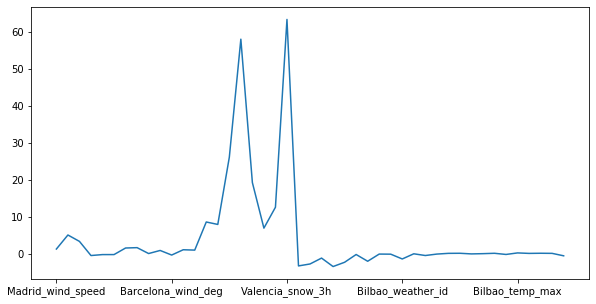

In [799]:
plt.figure(figsize = [10,5])
spain_train.skew(axis=0, skipna=True).plot()


In [800]:
spain_train.kurtosis()

Madrid_wind_speed          2.036462
Bilbao_rain_1h            32.904656
Valencia_wind_speed       35.645426
Seville_humidity          -1.017983
Madrid_humidity           -1.167537
Bilbao_clouds_all         -1.533417
Bilbao_wind_speed          3.631565
Seville_clouds_all         2.155921
Bilbao_wind_deg           -1.083530
Barcelona_wind_speed       1.493635
Barcelona_wind_deg        -0.959160
Madrid_clouds_all          0.142079
Seville_wind_speed         1.398580
Barcelona_rain_1h        101.578931
Seville_rain_1h           93.840746
Bilbao_snow_3h           806.128471
Barcelona_pressure      3687.564230
Seville_rain_3h          413.136592
Madrid_rain_1h            76.584491
Barcelona_rain_3h        187.800460
Valencia_snow_3h        4089.323165
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882
Bilbao_pressure            1.825323
Seville_weather_id        10.710308
Valencia_pressure          4.188187
Seville_temp_max          -0.515989
Madrid_pressure            2

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---




In [801]:
#feature engineering on columns with data type object. extraction and conversion
spain_train['Seville_pressure'] = spain_train['Seville_pressure'].str.extract('(\d+)').astype('int64')

In [802]:
#feature engineering on columns with data type object. extraction and conversion
spain_train['Valencia_wind_deg'] = spain_train['Valencia_wind_deg'].str.extract('(\d+)').astype('int64')

In [803]:
#changing time to date time 
spain_train['time'] = pd.to_datetime(spain_train['time'])

print(spain_train[0:1].time, spain_train[-1:].time)
print(spain_train['time'].dtypes)

0   2015-01-01 03:00:00
Name: time, dtype: datetime64[ns] 8762   2017-12-31 21:00:00
Name: time, dtype: datetime64[ns]
datetime64[ns]


In [804]:
#feature engineering on columns with data type object. extraction and conversion
spain_train['Year']  = spain_train['time'].astype('datetime64').dt.year
spain_train['Month_of_year']  = spain_train['time'].astype('datetime64').dt.month
spain_train['Day_of_month']  = spain_train['time'].astype('datetime64').dt.day
spain_train['Hour_of_day']  = spain_train['time'].astype('datetime64').dt.hour


In [805]:
spain_train.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,Year,Month_of_year,Day_of_month,Hour_of_day
0,2015-01-01 03:00:00,0.666667,5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,...,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667,2015,1,1,3
1,2015-01-01 06:00:00,0.333333,10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,...,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667,2015,1,1,6
2,2015-01-01 09:00:00,1.000000,9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,...,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667,2015,1,1,9
3,2015-01-01 12:00:00,1.000000,8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,...,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667,2015,1,1,12
4,2015-01-01 15:00:00,1.000000,7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,...,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667,2015,1,1,15


In [806]:
# engineer existing features
spain_train = spain_train.drop(columns=['Valencia_pressure','Seville_temp_max','Valencia_temp_max', 'Barcelona_temp_max', 
                                        'Madrid_temp_max', 'Bilbao_temp_max','Valencia_temp_min', 'Bilbao_temp_min', 
                                        'Barcelona_temp_min', 'Seville_temp_min', 'Madrid_temp_min','Year', 'Month_of_year', 'Day_of_month',
       'Hour_of_day'])

spain_train.shape

(8763, 37)

In [807]:
spain_train.columns

Index(['time', 'Madrid_wind_speed', 'Valencia_wind_deg', 'Bilbao_rain_1h',
       'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity',
       'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all',
       'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg',
       'Madrid_clouds_all', 'Seville_wind_speed', 'Barcelona_rain_1h',
       'Seville_pressure', 'Seville_rain_1h', 'Bilbao_snow_3h',
       'Barcelona_pressure', 'Seville_rain_3h', 'Madrid_rain_1h',
       'Barcelona_rain_3h', 'Valencia_snow_3h', 'Madrid_weather_id',
       'Barcelona_weather_id', 'Bilbao_pressure', 'Seville_weather_id',
       'Madrid_pressure', 'Valencia_temp', 'Bilbao_weather_id', 'Seville_temp',
       'Valencia_humidity', 'Barcelona_temp', 'Bilbao_temp', 'Madrid_temp',
       'load_shortfall_3h'],
      dtype='object')

In [808]:
X = spain_train.drop(columns = 'load_shortfall_3h')
y = spain_train['load_shortfall_3h'].astype('float64')


In [809]:
#bestfeatures = SelectKBest(score_func=f_regression, k=10).fit_transform(X,y)
#print(bestfeatures[:5])

In [810]:
X = X[['time', 'Madrid_wind_speed', 'Valencia_wind_deg', 'Bilbao_rain_1h',
       'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity',
       'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all',
       'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg',
       'Madrid_clouds_all', 'Seville_wind_speed', 'Barcelona_rain_1h',
       'Seville_pressure', 'Seville_rain_1h', 'Bilbao_snow_3h',
       'Barcelona_pressure', 'Seville_rain_3h', 'Madrid_rain_1h',
       'Barcelona_rain_3h', 'Valencia_snow_3h', 'Madrid_weather_id',
       'Barcelona_weather_id', 'Bilbao_pressure', 'Seville_weather_id',
       'Madrid_pressure', 'Valencia_temp', 'Bilbao_weather_id', 'Seville_temp',
       'Valencia_humidity', 'Barcelona_temp', 'Bilbao_temp', 'Madrid_temp']]
X.shape

(8763, 36)

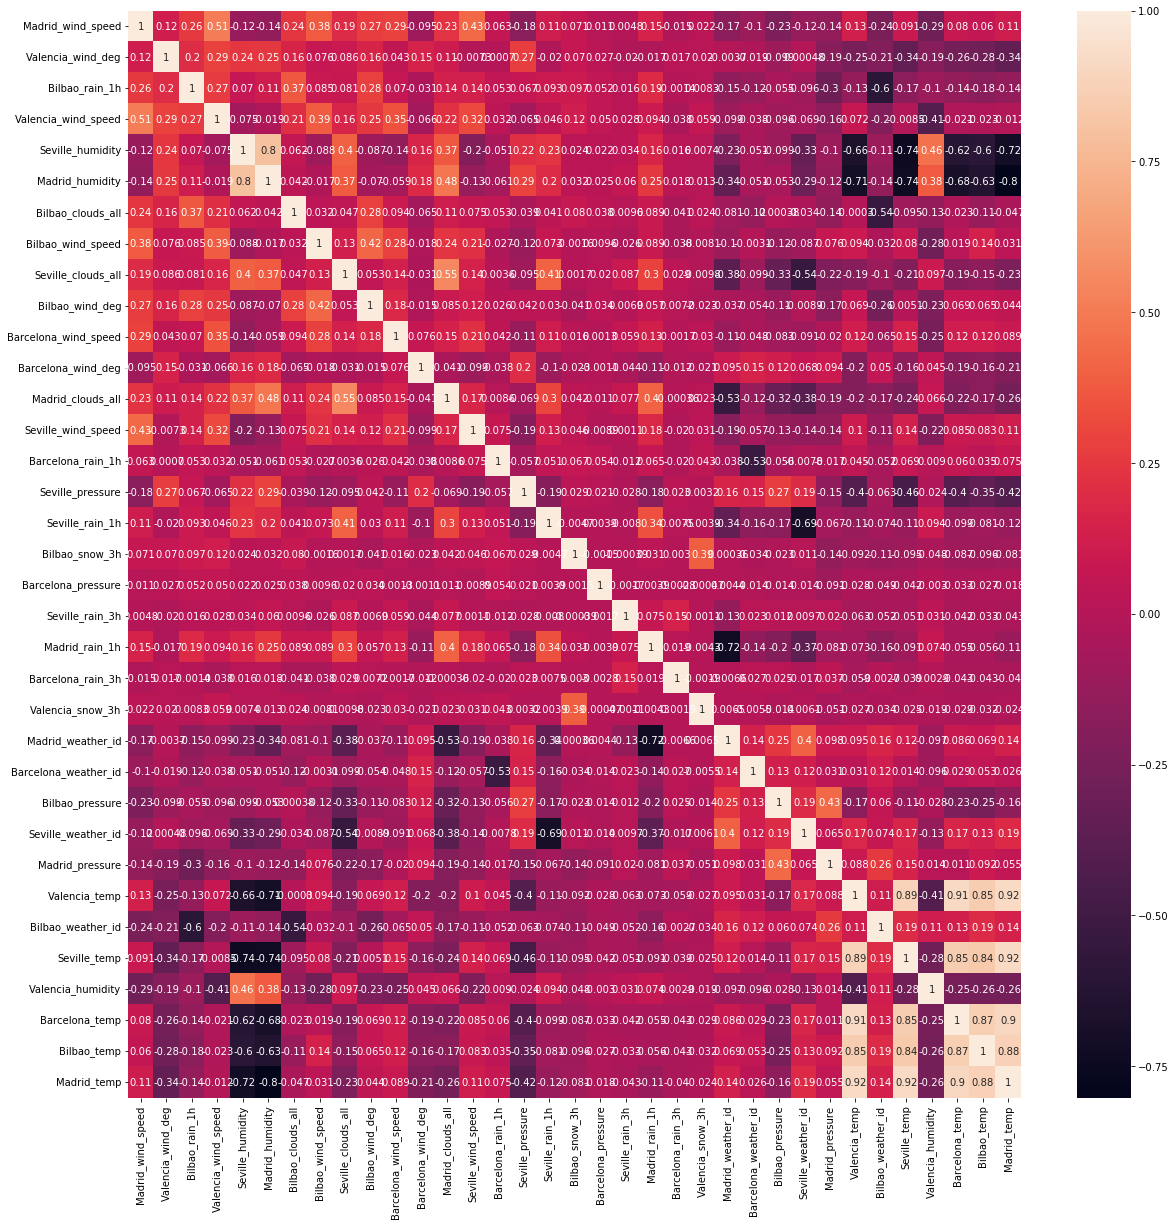

In [811]:
plt.figure(figsize=[20,20])
sns.heatmap(X.corr(),annot=True )

In [812]:
scaler = StandardScaler()

In [813]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.8, test_size=0.2, random_state = 42)

In [814]:
print('Training predictor:', X_train.shape)
print('Training target:', y_train.shape)
print('Testing predictor:', X_test.shape)
print('Testing target:', y_test.shape)


Training predictor: (7010, 16)
Training target: (7010,)
Testing predictor: (1753, 16)
Testing target: (1753,)


In [815]:
lm = LinearRegression()

In [816]:
lm.fit(X_train, y_train)

LinearRegression()

In [817]:
predict = lm.predict(X_test)
train_predict = lm.predict(X_train)

In [818]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)

Lasso(alpha=0.01)

In [819]:
#create one or more ML models
lasso_pred = lasso.predict(X_test)

In [820]:
#evaluate one or more ML models
Ridge = Ridge()
Ridge.fit(X_train, y_train)

Ridge()

In [821]:
Ridge_pred = Ridge.predict(X_test)

In [822]:
Sv_reg = SVR(kernel='rbf', gamma='auto') 

In [823]:
Sv_reg.fit(X_train,y_train)

SVR(gamma='auto')

In [824]:
SV_pred = Sv_reg.predict(X_test)

In [825]:
Reg_tree = DecisionTreeRegressor(random_state=42)

In [826]:
Reg_tree.fit(X_train,y_train)
ree_pred = Reg_tree.predict(X_test)

In [827]:
RF = RandomForestRegressor(n_estimators=200, max_depth=8)

In [828]:
RF.fit(X_train,y_train)
RF_predict = RF.predict(X_test)

In [829]:
# Compare model performance
Linear = pd.DataFrame({'Actual': y_test, 'Predicted': predict})
Lass_ = pd.DataFrame({'Actual': y_test, 'Predicted': lasso_pred})
Ridge_ = pd.DataFrame({'Actual': y_test, 'Predicted': Ridge_pred})
Sv_ = pd.DataFrame({'Actual': y_test, 'Predicted': SV_pred})
#Des_ = pd.DataFrame({'Actual': y_test, 'Predicted': Tree_pred})
Rand_ = pd.DataFrame({'Actual': y_test, 'Predicted': RF_predict})

In [830]:
print(Linear.head()) 

            Actual     Predicted
1226  11450.666667  11343.624524
7903  13693.333333  12693.479359
1559  18337.333333  12371.326774
3621  -1221.000000   8937.029137
7552   8515.000000  14460.816843


In [831]:
print(Lass_.head()) 

            Actual     Predicted
1226  11450.666667  11343.621728
7903  13693.333333  12693.380326
1559  18337.333333  12371.395689
3621  -1221.000000   8937.060644
7552   8515.000000  14460.721572


In [832]:
print(Ridge_.head()) 

            Actual     Predicted
1226  11450.666667  11344.375731
7903  13693.333333  12691.723632
1559  18337.333333  12372.113095
3621  -1221.000000   8937.347623
7552   8515.000000  14459.421298


In [833]:
print(Sv_.head()) 

            Actual     Predicted
1226  11450.666667  11099.510188
7903  13693.333333  11147.861367
1559  18337.333333  11223.279130
3621  -1221.000000  10981.302599
7552   8515.000000  11245.821094


In [834]:
print(Des_.head()) 

      Actual  Predicted
1226   11450     6395.0
7903   13693    11724.0
1559   18337    18497.0
3621   -1221    12647.0
7552    8515    17973.0


In [835]:
print(Rand_.head()) 

            Actual     Predicted
1226  11450.666667  11107.460639
7903  13693.333333  10561.182932
1559  18337.333333  13457.950100
3621  -1221.000000   6904.145707
7552   8515.000000  13261.052599


In [836]:
Model_Performance = { 
    
                      'Test RMSE':
                    
                        {"Linear model": np.sqrt(metrics.mean_squared_error(y_test,predict)),
                        "Ridge": np.sqrt(metrics.mean_squared_error(y_test,Ridge_pred)),
                        "Lasso" : np.sqrt(metrics.mean_squared_error(y_test,lasso_pred)),
                        "SVR" : np.sqrt(metrics.mean_squared_error(y_test,SV_pred)),
                        "Decision Tree" : np.sqrt(metrics.mean_squared_error(y_test,Tree_pred)),
                        "Random Forest" : np.sqrt(metrics.mean_squared_error(y_test,RF_predict))}
                        
                    }


In [837]:
Model_Performance = pd.DataFrame(data=Model_Performance)
Model_Performance

,Test RMSE
Decision Tree,6226.572335
Lasso,4997.095055
Linear model,4997.092645
Random Forest,4735.751875
Ridge,4997.138050
SVR,5298.470881


In [838]:
px.bar(Model_Performance, y =Model_Performance['Test RMSE'],
       color = Model_Performance.index, width =700, height=400)

In [839]:
Model_Performance2 = { 
    
                      'Test MSE':
                    
                        {"Linear model": (metrics.mean_squared_error(y_test,predict)),
                        "Ridge": (metrics.mean_squared_error(y_test,Ridge_pred)),
                        "Lasso" : (metrics.mean_squared_error(y_test,lasso_pred)),
                        "SVR" : (metrics.mean_squared_error(y_test,SV_pred)),
                        "Decision Tree" : (metrics.mean_squared_error(y_test,Tree_pred)),
                        "Random Forest" : (metrics.mean_squared_error(y_test,RF_predict))}
                        
                    }


In [840]:
Model_Performance2 = pd.DataFrame(data=Model_Performance2)
Model_Performance2

,Test MSE
Decision Tree,3.877020e+07
Lasso,2.497096e+07
Linear model,2.497093e+07
Random Forest,2.242735e+07
Ridge,2.497139e+07
SVR,2.807379e+07


In [841]:
Model_Performance3= { 
    
                      'Test MAE':
                    
                        {"Linear model": (metrics.mean_absolute_error(y_test,predict)),
                        "Ridge": (metrics.mean_absolute_error(y_test,Ridge_pred)),
                        "Lasso" : (metrics.mean_absolute_error(y_test,lasso_pred)),
                        "SVR" : (metrics.mean_absolute_error(y_test,SV_pred)),
                        "Decision Tree" : (metrics.mean_absolute_error(y_test,Tree_pred)),
                        "Random Forest" : (metrics.mean_absolute_error(y_test,RF_predict))}
                        
                    }


In [842]:
Model_Performance3 = pd.DataFrame(data=Model_Performance3)

In [843]:
Model_Performance3

,Test MAE
Decision Tree,4798.474904
Lasso,3992.059399
Linear model,3992.055388
Random Forest,3762.297770
Ridge,3992.106017
SVR,4229.349896


In [844]:
px.bar(Model_Performance3, y =Model_Performance3['Test MAE'],
       color = Model_Performance3.index, width =700, height=400)

In [845]:
Model_Performance4= { 
    
                      'Test R^2':
                    
                        {"Linear model": (metrics.r2_score(y_test,predict)),
                        "Ridge": (metrics.r2_score(y_test,Ridge_pred)),
                        "Lasso" : (metrics.r2_score(y_test,lasso_pred)),
                        "SVR" : (metrics.r2_score(y_test,SV_pred)),
                        "Decision Tree" : (metrics.r2_score(y_test,Tree_pred)),
                        "Random Forest" : (metrics.r2_score(y_test,RF_predict))}}


In [846]:
Model_Performance4 = pd.DataFrame(data=Model_Performance4)
Model_Performance4

,Test R^2
Decision Tree,-0.376642
Lasso,0.113338
Linear model,0.113339
Random Forest,0.203656
Ridge,0.113323
SVR,0.003163


In [847]:
px.bar(Model_Performance4, y =Model_Performance4['Test R^2'],
       color = Model_Performance4.index, width =700, height=400)

In [848]:
spain_test['Year']  = spain_test['time'].astype('datetime64').dt.year
spain_test['Month_of_year']  = spain_test['time'].astype('datetime64').dt.month
spain_test['Day_of_month']  = spain_test['time'].astype('datetime64').dt.day
spain_test['Hour_of_day']  = spain_test['time'].astype('datetime64').dt.hour


In [849]:
time = spain_test['time']

In [850]:
spain_test['Valencia_wind_deg'] = spain_test['Valencia_wind_deg'].str.extract('(\d+)').astype('int64')
spain_test['Seville_pressure'] = spain_test['Seville_pressure'].str.extract('(\d+)').astype('int64')


In [851]:
spain_test.kurtosis()

Madrid_wind_speed          2.567383
Valencia_wind_deg         -1.142026
Bilbao_rain_1h            16.905396
Valencia_wind_speed        2.100244
Seville_humidity          -0.710306
Madrid_humidity           -1.134569
Bilbao_clouds_all         -1.488942
Bilbao_wind_speed          2.306390
Seville_clouds_all         1.417797
Bilbao_wind_deg           -1.017392
Barcelona_wind_speed       1.410571
Barcelona_wind_deg        -0.956300
Madrid_clouds_all         -0.566527
Seville_wind_speed         2.369604
Barcelona_rain_1h         52.069367
Seville_pressure          -1.001501
Seville_rain_1h           48.243445
Bilbao_snow_3h             0.000000
Barcelona_pressure         1.175366
Seville_rain_3h         2920.000000
Madrid_rain_1h            41.250278
Barcelona_rain_3h       1642.238858
Valencia_snow_3h           0.000000
Madrid_weather_id          5.349404
Barcelona_weather_id       6.056749
Bilbao_pressure            1.866927
Seville_weather_id         9.557456
Valencia_pressure          4

In [852]:
#changing time to date time 
spain_test['time'] = pd.to_datetime(spain_test['time'])

print(spain_test[0:1].time, spain_test[-1:].time)
print(spain_test['time'].dtypes)

8763   2018-01-01
Name: time, dtype: datetime64[ns] 11682   2018-12-31 21:00:00
Name: time, dtype: datetime64[ns]
datetime64[ns]


In [853]:
# engineer existing features
spain_test = spain_test.drop(columns=['Valencia_pressure','Seville_temp_max','Valencia_temp_max', 'Barcelona_temp_max', 
                                        'Madrid_temp_max', 'Bilbao_temp_max','Valencia_temp_min', 'Bilbao_temp_min', 
                                        'Barcelona_temp_min', 'Seville_temp_min', 'Madrid_temp_min'])

spain_test.shape

(2920, 40)

In [854]:
spain_test = spain_test[['time', 'Madrid_wind_speed', 'Valencia_wind_deg', 'Bilbao_rain_1h',
       'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity',
       'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all',
       'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg',
       'Madrid_clouds_all', 'Seville_wind_speed', 'Barcelona_rain_1h',
       'Seville_pressure', 'Seville_rain_1h', 'Bilbao_snow_3h',
       'Barcelona_pressure', 'Seville_rain_3h', 'Madrid_rain_1h',
       'Barcelona_rain_3h', 'Valencia_snow_3h', 'Madrid_weather_id',
       'Barcelona_weather_id', 'Bilbao_pressure', 'Seville_weather_id',
       'Madrid_pressure', 'Valencia_temp', 'Bilbao_weather_id', 'Seville_temp',
       'Valencia_humidity', 'Barcelona_temp', 'Bilbao_temp', 'Madrid_temp']]
spain_test.shape

(2920, 36)

In [855]:
spain_test['load_shortfall_3h'] = RF.predict(spain_test)

c:\Users\OSAS.H\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\base.py:493: FutureWarning:

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Barcelona_pressure
- Barcelona_rain_1h
- Barcelona_rain_3h
- Barcelona_temp
- Barcelona_weather_id
- ...




TypeError: invalid type promotion

In [ ]:
spain_test['time'] = time
load = spain_test[['time','load_shortfall_3h']]
load.to_csv('submission_predict.csv', index = False)
load


,time,load_shortfall_3h
8763,2018-01-01 00:00:00,10352.246676
8764,2018-01-01 03:00:00,9996.981162
8765,2018-01-01 06:00:00,9407.605147
8766,2018-01-01 09:00:00,10330.310033
8767,2018-01-01 12:00:00,10352.246676
...,...,...
11678,2018-12-31 09:00:00,9435.113330
11679,2018-12-31 12:00:00,9153.306826
11680,2018-12-31 15:00:00,9042.447665
11681,2018-12-31 18:00:00,9259.228297
